In [1]:
%autocall 1

Automatic calling is: Smart


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

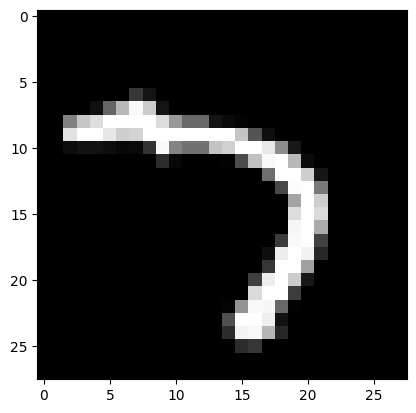

In [2]:
train = pd.read_csv('images/mnist_train.csv')

row_num = np.random.randint(train.shape[0])

pixels = train.iloc[row_num][1:].values.reshape(28, 28)
image = np.array(pixels, dtype=np.uint8)
image = Image.fromarray(image)

plt.imshow(image, cmap='gray')
plt.show()           

In [5]:
image = np.array(image)

rows, cols = image.shape
noisy_image = np.zeros_like(image, dtype = 'uint8')

mean = 0
std_dev = 20

gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

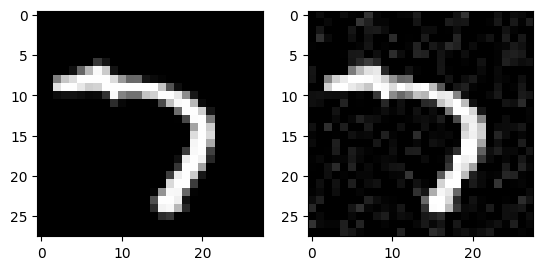

In [6]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.show()

In [6]:
def create_averaging_filter(size):
    kernel = np.ones((size, size), dtype=np.float32) / (size * size)
    return kernel

In [7]:
mask_size = 3

mask = create_averaging_filter(mask_size)

print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [8]:
def convolve2d(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = 28, 28
    kernel_height, kernel_width = 3, 3
    
    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    
    # Prepare an output array
    output = np.zeros_like(image)
    
    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

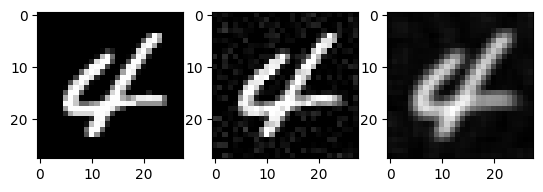

In [9]:
filtered_image = convolve2d(noisy_image, mask)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')

plt.show()

In [12]:
def salt_pepper_noise(image, amount):
    image = Image.fromarray(image).convert('L')
    pixels = image.load()
    
    width, height = image.size
    num_noise_pixels = int(amount * width * height)

    for _ in range(num_noise_pixels // 2):
        x = np.random.randint(0, width -1)
        y = np.random.randint(0, height - 1)
        pixels[x, y] = 255
        
    for _ in range(num_noise_pixels // 2):
        x = np.random.randint(0, width -1)
        y = np.random.randint(0, height - 1)
        pixels[x, y] = 0

    return image

snp_image = salt_pepper_noise(image, 0.02)

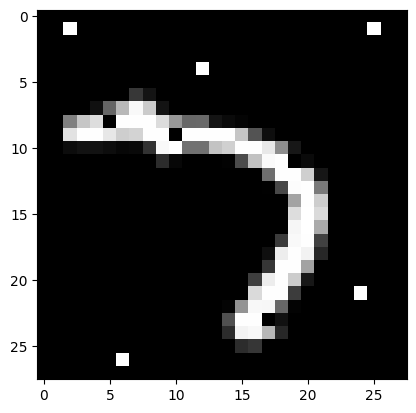

In [13]:
plt.imshow(snp_image, cmap='gray')
plt.show()

In [ ]:
def median_filter(image):
    image = image.convert("L")

    # Convert the image to a NumPy array
    image_array = np.array(image)
    row, column = image_array.shape

    # Define mask size
    mh, mw = 3, 3  # Mask size is 3x3
    new_image_array = np.zeros((row, column), dtype=np.uint8)

    # Apply the median filter
    for i in range(row - mh + 1):
        for j in range(column - mw + 1):
            rows = range(i, i + mh)
            cols = range(j, j + mw)
            part = np.sort(np.ravel(image_array[np.ix_(rows, cols)]))
            new_image_array[i + mh // 2, j + mw // 2] = part[len(part) // 2]  # Median is the middle value

    # Convert the filtered array back to a Pillow Image
    return Image.fromarray(new_image_array)

In [ ]:
median_filtered_image = median_filter(snp_image)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(snp_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')

plt.show()